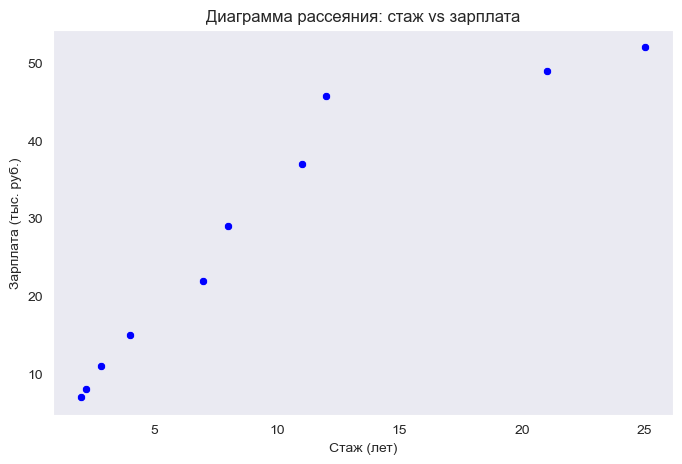

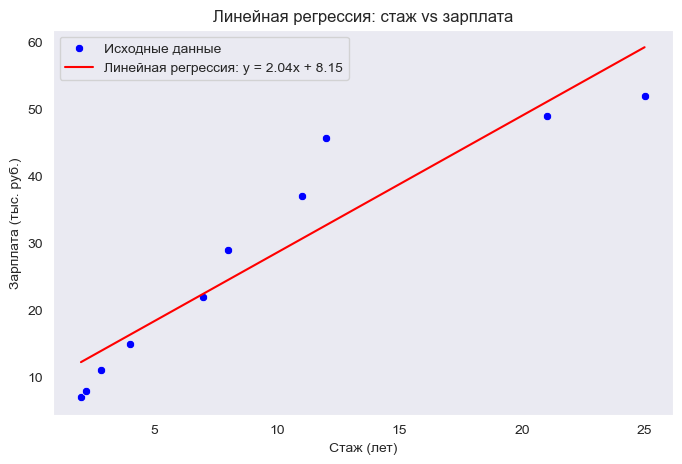

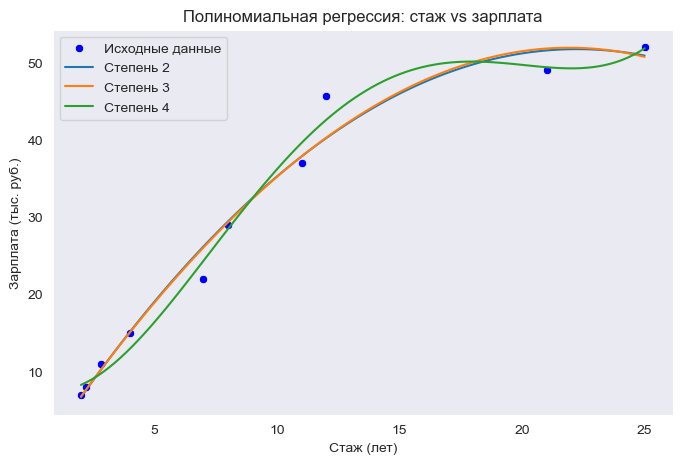

{2: array([ 45.9836533 , -52.36570663]),
 3: array([ 46.18687307, -81.43302656]),
 4: array([  48.50430672, 2216.44591479]),
 'Линейная': array([ 38.81224982, 116.48597583])}

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


def load_data(filename):
    """Загрузка данных из CSV файла"""
    return pd.read_csv(filename)



df = load_data('salary_experience.csv')
df.head()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Exp"], y=df["Salary"], color="blue")

plt.xlabel("Стаж (лет)")
plt.ylabel("Зарплата (тыс. руб.)")
plt.title("Диаграмма рассеяния: стаж vs зарплата")
plt.grid()
plt.show()

# Подготовка данных
X = df[["Exp"]].values  # Признак (стаж)
y = df["Salary"].values  # Целевая переменная (зарплата)

# Обучение модели линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Предсказания
y_pred = lin_reg.predict(X)

# Вычисление метрик
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Уравнение модели
coef = lin_reg.coef_[0]
intercept = lin_reg.intercept_

# Визуализация
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Exp"], y=df["Salary"], color="blue", label="Исходные данные")
plt.plot(df["Exp"], y_pred, color="red", label=f"Линейная регрессия: y = {coef:.2f}x + {intercept:.2f}")

# Подписи осей
plt.xlabel("Стаж (лет)")
plt.ylabel("Зарплата (тыс. руб.)")
plt.title("Линейная регрессия: стаж vs зарплата")
plt.legend()
plt.grid()
plt.show()

# Вывод уравнения и метрик
coef, intercept, r2, mae, mse


# Функция для построения полиномиальной регрессии и вычисления метрик
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_poly_pred)
    mae = mean_absolute_error(y, y_poly_pred)
    mse = mean_squared_error(y, y_poly_pred)
    
    return poly, model, y_poly_pred, r2, mae, mse

# Обучение моделей
degrees = [2, 3, 4]
results = {}

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Exp"], y=df["Salary"], color="blue", label="Исходные данные")

# Построение моделей и графиков
x_range = np.linspace(df["Exp"].min(), df["Exp"].max(), 100).reshape(-1, 1)
for d in degrees:
    poly, model, y_poly_pred, r2, mae, mse = polynomial_regression(d)
    results[d] = (r2, mae, mse)
    
    # Построение графика
    X_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(X_range_poly)
    plt.plot(x_range, y_range_pred, label=f"Степень {d}")

# Настройки графика
plt.xlabel("Стаж (лет)")
plt.ylabel("Зарплата (тыс. руб.)")
plt.title("Полиномиальная регрессия: стаж vs зарплата")
plt.legend()
plt.grid()
plt.show()

# Вывод метрик
results

# Функция для предсказания зарплаты по разным моделям
def predict_salary(models, degrees, experience_values):
    predictions = {}
    for d in degrees:
        poly, model, _, _, _, _ = models[d]
        X_exp_poly = poly.transform(np.array(experience_values).reshape(-1, 1))
        y_pred = model.predict(X_exp_poly)
        predictions[d] = y_pred
    return predictions

# Значения стажа для предсказания
experience_values = [15, 53]

# Обучение моделей и предсказание
models = {}
for d in degrees:
    models[d] = polynomial_regression(d)

predictions = predict_salary(models, degrees, experience_values)

# Добавление предсказания линейной модели
predictions["Линейная"] = lin_reg.predict(np.array(experience_values).reshape(-1, 1))

# Вывод результатов
predictions
